# TP 4 - Introducción al aprendizaje automatizado
### Juan Ignacio Farizano

--------------------------------------------------------------------------------

In [1]:
# Imports iniciales
%matplotlib inline
from common import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

--------------------------------------------------------------------------------
## Ejercicio 1

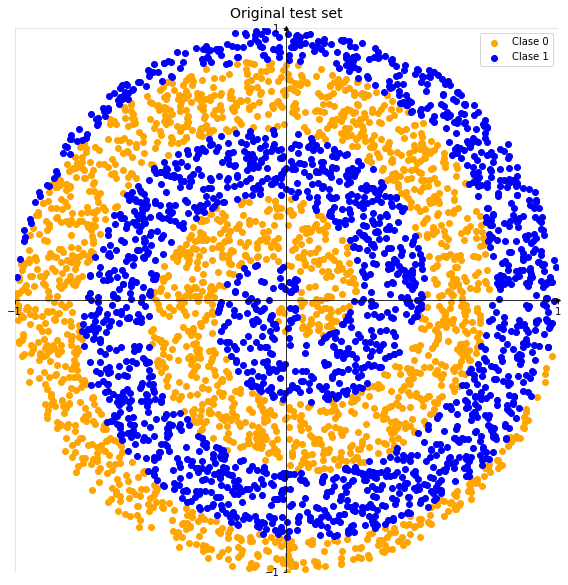

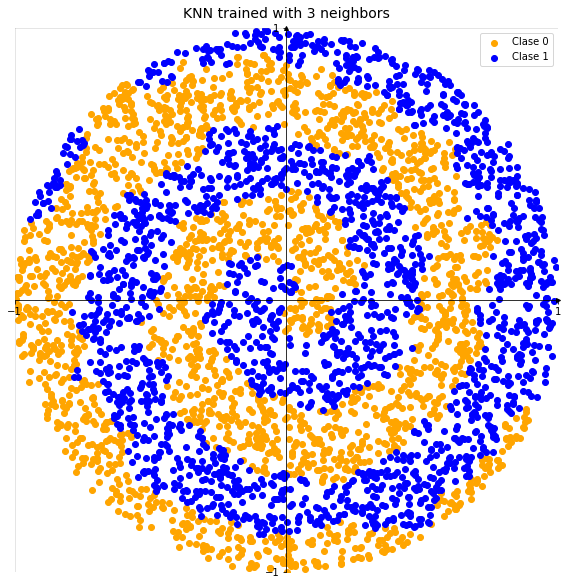

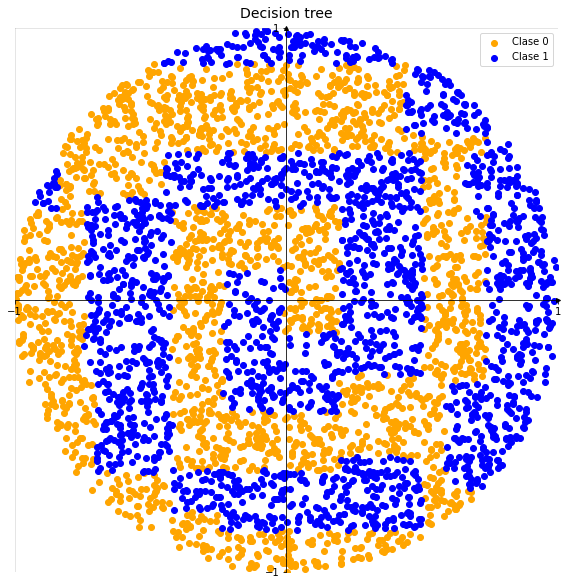

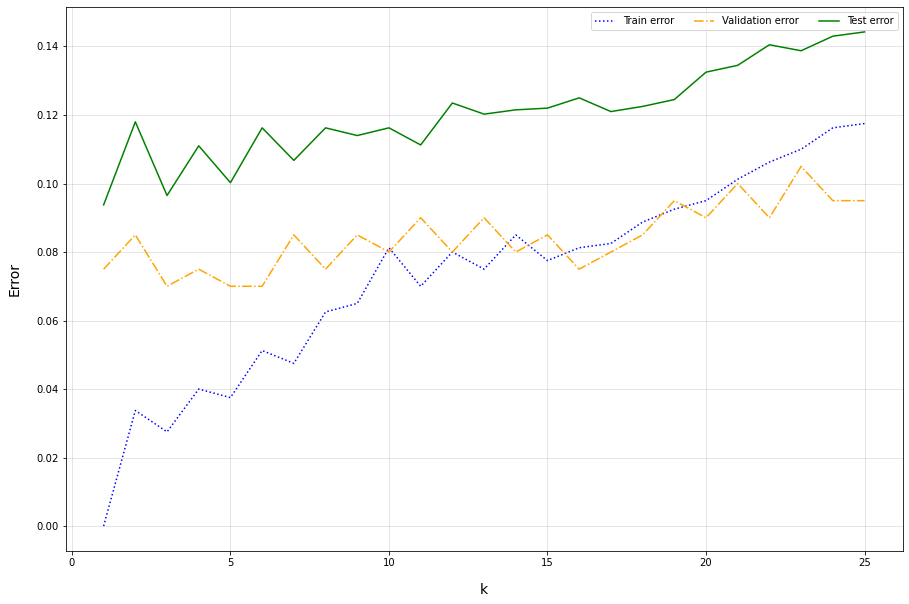

In [4]:
# Primero sin ruido
col_names = [0, 1, 'Class']
x_col_names = col_names[:-1]
y_col_name = col_names[-1]

# Leo el conjunto de datos utilizado para entrenar y vaidar
df_data_spirals = pd.read_csv("datasets/espirales_con_ruido/c_0.data", header=None, names = col_names)
# Separo un 20% al azar para conjunto de validación
X, y = df_data_spirals[x_col_names], df_data_spirals[y_col_name]
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0, test_size=0.2)

# Leo el conjunto de test
df_test_spirals = pd.read_csv("datasets/espirales_con_ruido/c_0.test", header=None, names = col_names)
X_test, y_test = df_test_spirals[x_col_names], df_test_spirals[y_col_name]

best_val_error = math.inf
errors = []

for k in list(range(1, 26)):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)

  predict_train = knn.predict(X_train)
  predict_val = knn.predict(X_val)
  predict_test = knn.predict(X_test)

  actual_train_error = 1 - accuracy_score(y_train, predict_train)
  actual_val_error = 1 - accuracy_score(y_val, predict_val)
  actual_test_error = 1 - accuracy_score(y_test, predict_test)

  errors.append([actual_train_error, k, "Train error"])
  errors.append([actual_val_error, k, "Validation error"])
  errors.append([actual_test_error, k, "Test error"])

  if actual_val_error < best_val_error:
    best_val_error = actual_val_error
    best_k = k
    best_knn = deepcopy(knn)
    knn_predict = deepcopy(predict_test)

clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.005,random_state=0,min_samples_leaf=5)
clf.fit(X_train, y_train)
clf_predict = clf.predict(X_test)

frame = {0 : X_test[0], 1 : X_test[1], 'Class' : knn_predict}
df_predict_knn = pd.DataFrame(frame, columns=[0, 1, 'Class'])
frame = {0 : X_test[0], 1 : X_test[1], 'Class' : clf_predict}
df_predict_clf = pd.DataFrame(frame, columns=[0, 1, 'Class'])

graph_df(df_test_spirals, title="Original test set")
graph_df(df_predict_knn, title=f"KNN trained with {best_k} neighbors")
graph_df(df_predict_clf, title="Decision tree")

errors_df = pd.DataFrame(errors, columns = ["Error", "k", "Class"])
graph_errors(errors_df, "k")

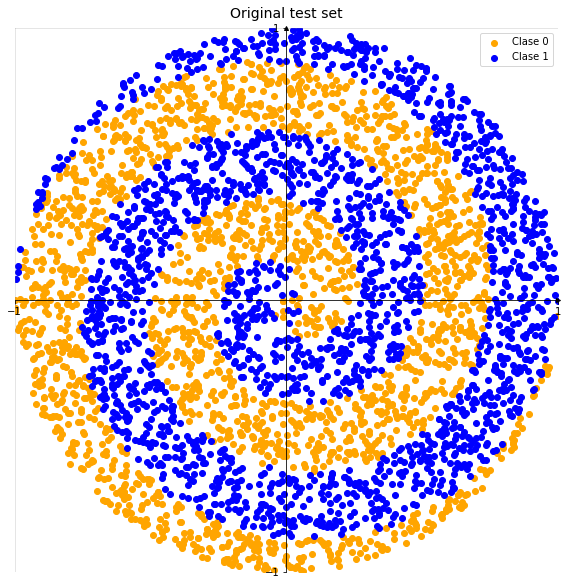

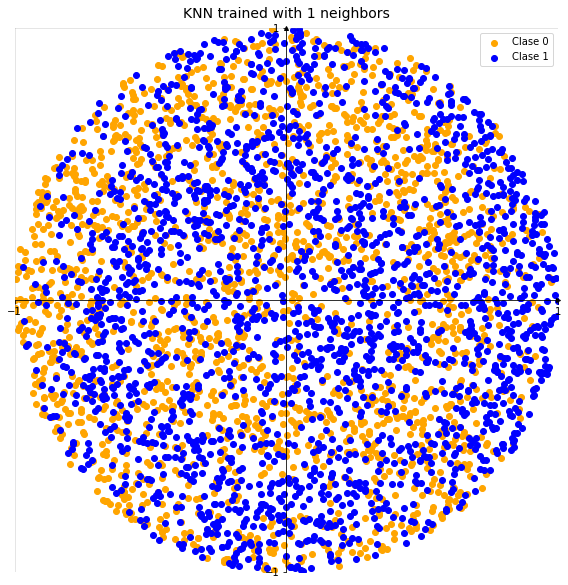

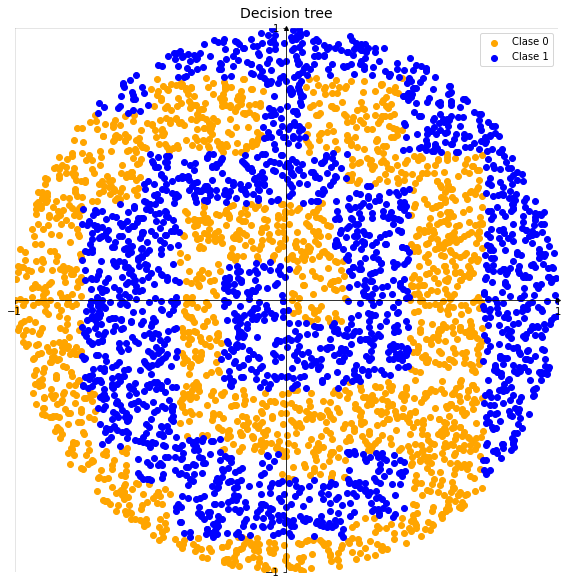

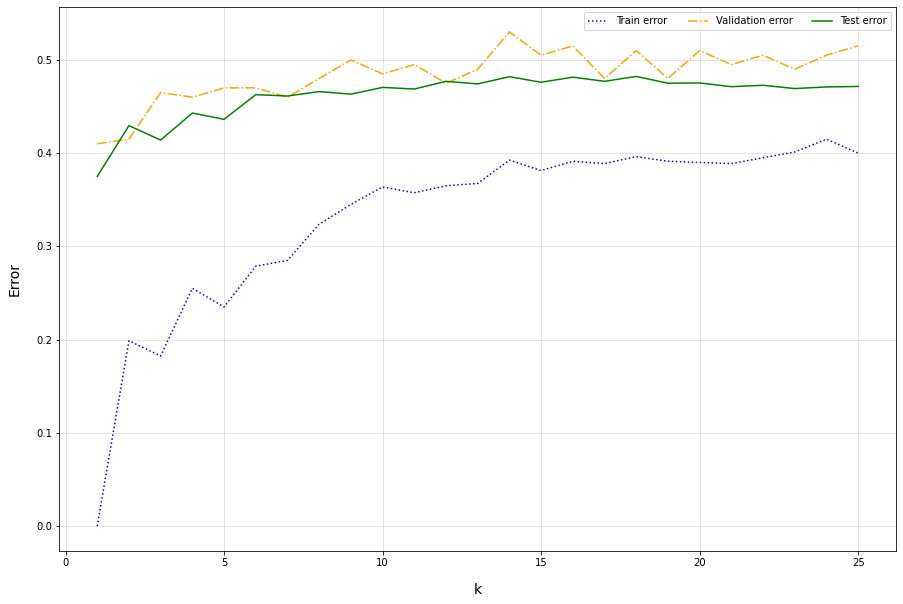

In [6]:
# Con ruido
col_names = [0, 1, 2, 3, 'Class']
x_col_names = col_names[:-1]
y_col_name = col_names[-1]

# Leo el conjunto de datos utilizado para entrenar y vaidar
df_data_spirals = pd.read_csv("datasets/espirales_con_ruido/c_2.data", header=None, names = col_names)
# Separo un 20% al azar para conjunto de validación
X, y = df_data_spirals[x_col_names], df_data_spirals[y_col_name]
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=0, test_size=0.2)

# Leo el conjunto de test
df_test_spirals = pd.read_csv("datasets/espirales_con_ruido/c_2.test", header=None, names = col_names)
X_test, y_test = df_test_spirals[x_col_names], df_test_spirals[y_col_name]

best_val_error = math.inf
errors = []

for k in list(range(1, 26)):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)

  predict_train = knn.predict(X_train)
  predict_val = knn.predict(X_val)
  predict_test = knn.predict(X_test)

  actual_train_error = 1 - accuracy_score(y_train, predict_train)
  actual_val_error = 1 - accuracy_score(y_val, predict_val)
  actual_test_error = 1 - accuracy_score(y_test, predict_test)

  errors.append([actual_train_error, k, "Train error"])
  errors.append([actual_val_error, k, "Validation error"])
  errors.append([actual_test_error, k, "Test error"])

  if actual_val_error < best_val_error:
    best_val_error = actual_val_error
    best_k = k
    best_knn = deepcopy(knn)
    knn_predict = deepcopy(predict_test)

clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.005,random_state=0,min_samples_leaf=5)
clf.fit(X_train, y_train)
clf_predict = clf.predict(X_test)

frame = {0 : X_test[0], 1 : X_test[1], 'Class' : knn_predict}
df_predict_knn = pd.DataFrame(frame, columns=[0, 1, 'Class'])
frame = {0 : X_test[0], 1 : X_test[1], 'Class' : clf_predict}
df_predict_clf = pd.DataFrame(frame, columns=[0, 1, 'Class'])

graph_df(df_test_spirals, title="Original test set")
graph_df(df_predict_knn, title=f"KNN trained with {best_k} neighbors")
graph_df(df_predict_clf, title="Decision tree")

errors_df = pd.DataFrame(errors, columns = ["Error", "k", "Class"])
graph_errors(errors_df, "k")

### Conclusiones


--------------------------------------------------------------------------------
## Ejercicio 2

In [12]:
errors = []

for d in [2 ** i for i in range(1, 6)]:
  x_col_names = list(range(d))
  y_col_name = 'Class'

  # Genero los conjuntos de test para cada d
  df_test_diag = generate_diagonal(d, 10000, 0.78)
  df_test_para = generate_parallel(d, 10000, 0.78)

  X_test_diag, y_test_diag = df_test_diag[x_col_names], df_test_diag[y_col_name]
  X_test_para, y_test_para = df_test_para[x_col_names], df_test_para[y_col_name]

  for k in [1, 3]:
    for i in range(20):
      # Genero los conjuntos de entrenamiento
      df_train_diag = generate_diagonal(d, 250, 0.78)
      df_train_para = generate_parallel(d, 250, 0.78)

      X_train_diag, y_train_diag = df_train_diag[x_col_names], df_train_diag[y_col_name]
      X_train_para, y_train_para = df_train_para[x_col_names], df_train_para[y_col_name]

      # Creo las redes neuronales
      knn_diag = KNeighborsClassifier(n_neighbors=k)
      knn_para = KNeighborsClassifier(n_neighbors=k)

      knn_diag.fit(X_train_diag, y_train_diag)
      knn_para.fit(X_train_para, y_train_para)

      predict_train_diag = knn_diag.predict(X_train_diag)
      predict_test_diag = knn_diag.predict(X_test_diag)
      predict_train_para = knn_para.predict(X_train_para)
      predict_test_para = knn_para.predict(X_test_para)

      actual_error_train_diag = 1 - accuracy_score(y_train_diag, predict_train_diag)
      actual_error_test_diag = 1 - accuracy_score(y_test_diag, predict_test_diag)  
      actual_error_train_para = 1 - accuracy_score(y_train_para, predict_train_para)
      actual_error_test_para = 1 - accuracy_score(y_test_para, predict_test_para)

      errors.append([actual_error_train_diag, d, f"KNN, K = {k} - Train diagonal"])
      errors.append([actual_error_test_diag, d, f"KNN, K = {k} - Test diagonal"])
      errors.append([actual_error_train_para, d, f"KNN, K = {k} - Train parallel"])
      errors.append([actual_error_test_para, d, f"KNN, K = {k} - Test parallel"])

errors_knn_df = pd.DataFrame(errors, columns = ["Error", "d", "Class"])
errors_knn_df.to_csv("datasets/dimensions/knn_dimensions_errors.csv", index = False)

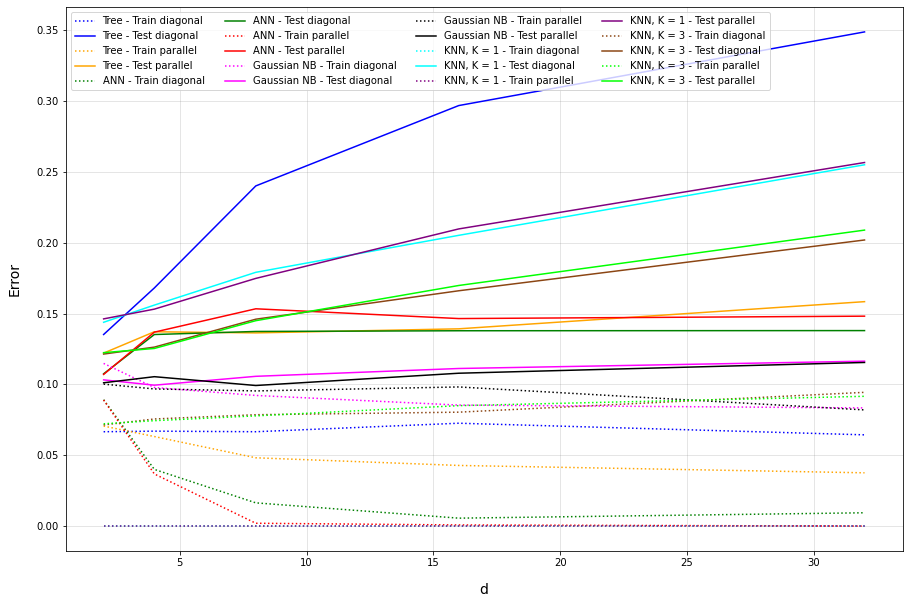

In [5]:
errors_tree_df = pd.read_csv("datasets/dimensions/tree_dimensions_errors.csv")
errors_ann_df = pd.read_csv("datasets/dimensions/ann_dimensions_errors.csv")
errors_bayes_df = pd.read_csv("datasets/dimensions/bayes_dimensions_errors.csv")
errors_knn_df = pd.read_csv("datasets/dimensions/knn_dimensions_errors.csv")
errors_df = pd.concat([errors_tree_df, errors_ann_df, errors_bayes_df, errors_knn_df])
graph_errors_dimensions(errors_df)

--------------------------------------------------------------------------------
## Ejercicio 3

Mejor k para problema diagonal: 34 con error de validación 0.12079999999999991, error de paralelo: 0.13319999999999993
Mejor k para problema paralelo: 41 con error de validación 0.12159999999999993. error de diagonal: 0.12799999999999995
Mejor k para ambos promediando: 42 con error de validación 0.12360000000000002. error de diagonal: 0.12459999999999999, error de paralelo: 0.1226


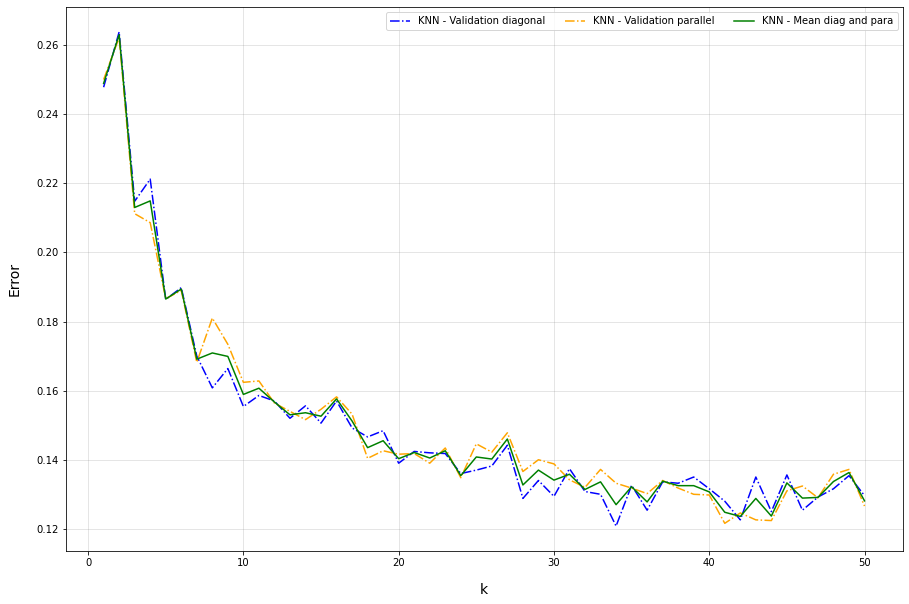

In [32]:
errors = []

d = 32
x_col_names = list(range(d))
y_col_name = 'Class'

best_val_error_diag = math.inf
best_val_error_para = math.inf
best_val_error_mean = math.inf

for k in range(1, 51):
  acum_diag = 0
  acum_para = 0
  acum_mean = 0

  # Repito una cantidad de alta porque los resultados me variaban mucho cada
  # vez que ejecutaba
  repeats = 100

  for _ in range (repeats):
    # Genero los conjuntos de entrenamiento
    df_train_diag = generate_diagonal(d, 250, 0.78)
    df_train_para = generate_parallel(d, 250, 0.78)

    X_diag, y_diag = df_train_diag[x_col_names], df_train_diag[y_col_name]
    X_train_diag, X_val_diag, y_train_diag, y_val_diag = train_test_split(X_diag, y_diag, random_state=0, test_size=0.2)
    X_para, y_para = df_train_para[x_col_names], df_train_para[y_col_name]
    X_train_para, X_val_para, y_train_para, y_val_para = train_test_split(X_para, y_para, random_state=0, test_size=0.2)

    # Creo las redes neuronales
    knn_diag = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn_para = KNeighborsClassifier(n_neighbors=k, weights='distance')
  
    knn_diag.fit(X_train_diag, y_train_diag)
    knn_para.fit(X_train_para, y_train_para)
  
    predict_val_diag = knn_diag.predict(X_val_diag)
    predict_val_para = knn_para.predict(X_val_para)
  
    actual_error_val_diag = 1 - accuracy_score(y_val_diag, predict_val_diag)
    actual_error_val_para = 1 - accuracy_score(y_val_para, predict_val_para)
    actual_error_val_mean = (actual_error_val_diag + actual_error_val_para) / 2
  
    acum_diag += actual_error_val_diag
    acum_para += actual_error_val_para
    acum_mean += actual_error_val_mean

    errors.append([actual_error_val_diag, k, f"KNN - Validation diagonal"])
    errors.append([actual_error_val_para, k, f"KNN - Validation parallel"])
    errors.append([actual_error_val_mean, k, f"KNN - Mean diag and para"])
  
  acum_diag /= repeats
  acum_para /= repeats
  acum_mean /= repeats

  if acum_diag < best_val_error_diag:
    best_val_error_diag = acum_diag
    best_k_diag = k
    best_diag_error_para = acum_para
    
  if acum_para < best_val_error_para:
    best_val_error_para = acum_para
    best_k_para = k
    best_para_error_diag = acum_diag
  
  if acum_mean < best_val_error_mean:
    best_val_error_mean = acum_mean
    best_k_mean = k
    best_mean_error_diag = acum_para
    best_mean_error_para = acum_diag

errors_df = pd.DataFrame(errors, columns = ["Error", "k", "Class"])
graph_errors(errors_df, 'k')

print(f"Mejor k para problema diagonal: {best_k_diag} con error de validación {best_val_error_diag}, error de paralelo: {best_diag_error_para}")
print(f"Mejor k para problema paralelo: {best_k_para} con error de validación {best_val_error_para}. error de diagonal: {best_para_error_diag}")
print(f"Mejor k para ambos promediando: {best_k_mean} con error de validación {best_val_error_mean}. error de diagonal: {best_mean_error_diag}, error de paralelo: {best_mean_error_para}")

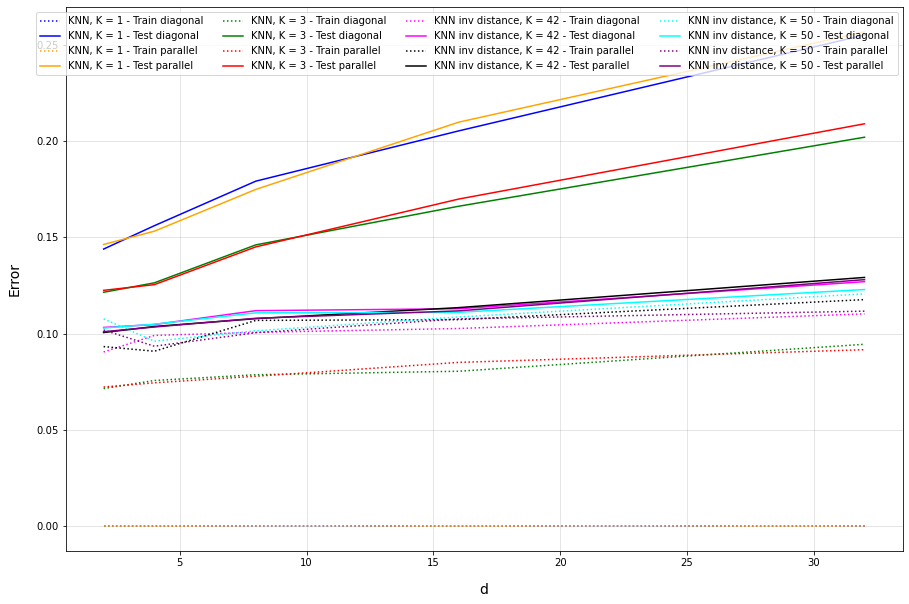

In [2]:
errors = []

for d in [2 ** i for i in range(1, 6)]:
  x_col_names = list(range(d))
  y_col_name = 'Class'

  # Genero los conjuntos de test para cada d
  df_test_diag = generate_diagonal(d, 10000, 0.78)
  df_test_para = generate_parallel(d, 10000, 0.78)

  X_test_diag, y_test_diag = df_test_diag[x_col_names], df_test_diag[y_col_name]
  X_test_para, y_test_para = df_test_para[x_col_names], df_test_para[y_col_name]

  for k in [42, 50]:
    for i in range(20):
      # Genero los conjuntos de entrenamiento
      df_train_diag = generate_diagonal(d, 250, 0.78)
      df_train_para = generate_parallel(d, 250, 0.78)

      X_train_diag, y_train_diag = df_train_diag[x_col_names], df_train_diag[y_col_name]
      X_train_para, y_train_para = df_train_para[x_col_names], df_train_para[y_col_name]

      # Creo las redes neuronales
      knn_diag = KNeighborsClassifier(n_neighbors=k)
      knn_para = KNeighborsClassifier(n_neighbors=k)

      knn_diag.fit(X_train_diag, y_train_diag)
      knn_para.fit(X_train_para, y_train_para)

      predict_train_diag = knn_diag.predict(X_train_diag)
      predict_test_diag = knn_diag.predict(X_test_diag)
      predict_train_para = knn_para.predict(X_train_para)
      predict_test_para = knn_para.predict(X_test_para)

      actual_error_train_diag = 1 - accuracy_score(y_train_diag, predict_train_diag)
      actual_error_test_diag = 1 - accuracy_score(y_test_diag, predict_test_diag)  
      actual_error_train_para = 1 - accuracy_score(y_train_para, predict_train_para)
      actual_error_test_para = 1 - accuracy_score(y_test_para, predict_test_para)

      errors.append([actual_error_train_diag, d, f"KNN inv distance, K = {k} - Train diagonal"])
      errors.append([actual_error_test_diag, d, f"KNN inv distance, K = {k} - Test diagonal"])
      errors.append([actual_error_train_para, d, f"KNN inv distance, K = {k} - Train parallel"])
      errors.append([actual_error_test_para, d, f"KNN inv distance, K = {k} - Test parallel"])

errors_distance_df = pd.DataFrame(errors, columns = ["Error", "d", "Class"])
errors_uniform_df = pd.read_csv("datasets/dimensions/knn_dimensions_errors.csv")
errors_df = pd.concat([errors_uniform_df, errors_distance_df])
graph_errors_dimensions(errors_df)

### Conclusiones


--------------------------------------------------------------------------------
## Ejercicio 4